# Resultados

## Testando os modelos

In [1]:
from keras.models import load_model
import matplotlib.pyplot as plt 
import numpy as np 
from PIL import Image

model_gender = load_model('models/gênero_final.h5')
model_ethnicity = load_model('models/etnia_final.h5')
model_age = load_model('models/idade_final.h5')

gender_dict = {
    0: 'Masculino',
    1: 'Feminino',
}

ethni_dict = {
    0:'Branca',
    1:'Negra',
    2:'Asiática',
    3:'Indiana',
    4:'Outra',
}

def print_predictions(image_path):
    img = Image.open(image_path)
    plt.imshow(img,cmap='gray')
    plt.show()
    
    x = [(image - image.min())/(image.max()-image.min()) for image in np.array(img)]
    x = np.expand_dims(x, axis=2)    
    x = np.expand_dims(x, axis=0)
    
    gender_output = model_gender.predict(x)
    age_output = model_age.predict(x)
    ethni_output = model_ethnicity.predict(x)
    
    gender = gender_dict[1 if gender_output[0][0] >= .5 else 0]
    ethni = ethni_dict[np.argmax(ethni_output)]
    age = int(np.round(age_output[0][0]))
    
    print('Saídas -\n ETNIA: {}\n IDADE: {}\n GÊNERO: {}\n'.format(
        ethni_output,
        age_output,
        gender_output))
    print('Previsões - ETNIA: {} IDADE: {} GÊNERO: {}'.format(ethni,age,gender)) 

Using TensorFlow backend.


## Contra imagens do treinamento

In [2]:
import os
import numpy as np

data_path = 'data/train_test/'
files = os.listdir(data_path) 

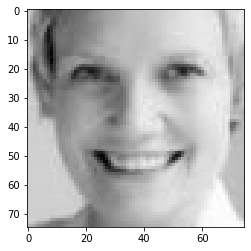

Saídas -
 ETNIA: [[0.93911475 0.00701241 0.01624227 0.0091871  0.0284434 ]]
 IDADE: [[22.21358]]
 GÊNERO: [[0.8916381]]

Previsões - ETNIA: Branca IDADE: 22 GÊNERO: Feminino
Valores reais - ETNIA: Branca IDADE: 35 GÊNERO: Feminino


In [23]:
file_path = files[np.random.randint(0,len(files))]
print_predictions(data_path+file_path)

age = file_path.split('/')[-1].split("_")[0].split('.')[-1]
gender = gender_dict[int(file_path.split("_")[1])]
ethni = ethni_dict[int(file_path.split("_")[2])]

print("Valores reais - ETNIA: {} IDADE: {} GÊNERO: {}".format(ethni,age,gender))

### Contra imagens que não vistas (holdout)

In [24]:
data_path = 'data/holdout/'
files = os.listdir(data_path) 

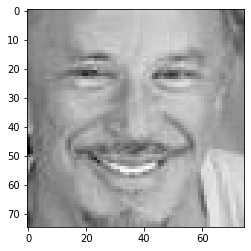

Saídas -
 ETNIA: [[0.84244347 0.02670874 0.08438142 0.01811788 0.02834847]]
 IDADE: [[52.280697]]
 GÊNERO: [[0.01215814]]

Previsões - ETNIA: Branca IDADE: 52 GÊNERO: Masculino
Valores reais - ETNIA: Branca IDADE: 50 GÊNERO: Masculino


In [33]:
file_path = files[np.random.randint(0,len(files))]
print_predictions(data_path+file_path)

age = file_path.split('/')[-1].split("_")[0]
gender = gender_dict[int(file_path.split("_")[1])]
ethni = ethni_dict[int(file_path.split("_")[2])]

print("Valores reais - ETNIA: {} IDADE: {} GÊNERO: {}".format(ethni,age,gender))

### Contato 
<p> <img style="float: left;" src="images/linkedin.png"> <a href="www.linkedin.com/in/icaro-marley">www.linkedin.com/in/icaro-marley</a> </p>
<p> <img style="float: left;" src="images/telegram.png"> icaro_marley </p>
<p> <img style="float: left;" src="images/gmail.png"> icaromarley5@gmail.com </p>


## Projeto disponível em 
<p> <img style="float: left;" src="images/github.png"> <a href="https://github.com/icaromarley5/Ethni_Age_Gender">https://github.com/icaromarley5/Ethni_Age_Gender</a></p>

# Fim e muito obrigado! Alguma dúvida?
<img style="float: left;" src="images/horse_ml.jpg">